In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

2022-04-19 19:29:58.093488: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-19 19:29:58.093523: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
generator = keras.models.load_model('datas/weights/generator.h5')
latent_dim = generator.input.shape[1]
print(f"Generator model loaded with latent dim: {latent_dim}")

2022-04-19 19:30:00.710969: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-19 19:30:00.711011: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-19 19:30:00.711039: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Inspiron-5558): /proc/driver/nvidia/version does not exist
2022-04-19 19:30:00.711295: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Generator model loaded with latent dim: 100


In [3]:
# Saját modell az inception v3 alapjaira (Transfer learning)
# (64, 64, 3)-as képeket vár bemenetként, majd one-hot encoding alapján adja ki a classokat (3 class)
# nem logits kimenetű
inception_model = keras.models.load_model('datas/animalFacesClassifier.h5')

In [4]:
# Gradient Descent with momentum
cross_entropy = keras.losses.CategoricalCrossentropy(from_logits=False)

def gradient_descent_momentum(goal_label, starting_noise, step_size, momentum, steps, verbose=False):
    noise = tf.Variable(starting_noise, name='noise')
    
    change = 0
    losses = []
    for i in range(steps):
        with tf.GradientTape() as g_tape:
            g_tape.watch(noise)

            generated_image = generator(noise, training=False)[0]
            
            predictions = inception_model(generated_image)
            
            loss = cross_entropy(goal_label, predictions[0])

        gradients = g_tape.gradient(loss, noise)
        change = (step_size * gradients) + momentum * change
        noise = noise - change

        if(verbose):
            print(predictions)
            print(f"Step: {i}, Loss: {loss}")
            plt.imshow((generated_image[0].numpy()*127.5+127.5).astype("uint8"), interpolation="none")
            plt.show()

        losses.append(loss)
    return noise, losses

tf.Tensor([[2.3779178e-03 2.0445135e-04 9.9741757e-01]], shape=(1, 3), dtype=float32)
Step: 0, Loss: 6.041530132293701


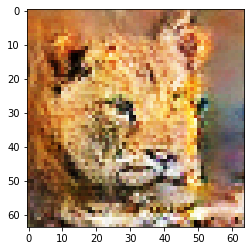

tf.Tensor([[0.22804154 0.00744851 0.7645099 ]], shape=(1, 3), dtype=float32)
Step: 1, Loss: 1.4782274961471558


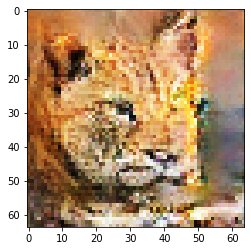

tf.Tensor([[2.6090708e-02 2.4698448e-04 9.7366232e-01]], shape=(1, 3), dtype=float32)
Step: 2, Loss: 3.6461760997772217


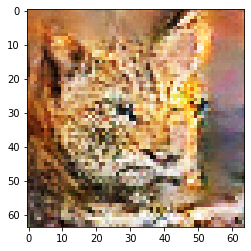

tf.Tensor([[0.8741114  0.0021606  0.12372787]], shape=(1, 3), dtype=float32)
Step: 3, Loss: 0.13454729318618774


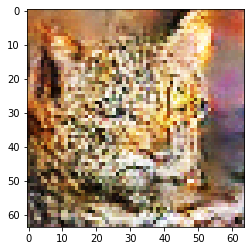

tf.Tensor([[0.18534917 0.00285309 0.81179774]], shape=(1, 3), dtype=float32)
Step: 4, Loss: 1.6855138540267944


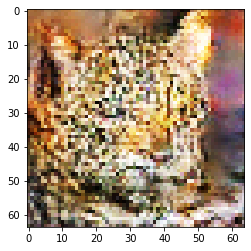

tf.Tensor([[0.33515984 0.08736628 0.5774738 ]], shape=(1, 3), dtype=float32)
Step: 5, Loss: 1.0931476354599


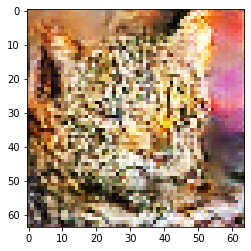

tf.Tensor([[0.8045517  0.00304467 0.1924036 ]], shape=(1, 3), dtype=float32)
Step: 6, Loss: 0.21747002005577087


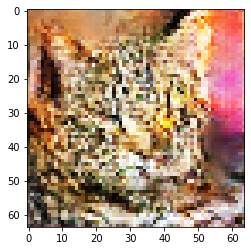

tf.Tensor([[0.7074796  0.05651563 0.23600477]], shape=(1, 3), dtype=float32)
Step: 7, Loss: 0.34604647755622864


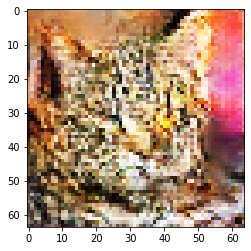

tf.Tensor([[0.5247104  0.04887358 0.42641607]], shape=(1, 3), dtype=float32)
Step: 8, Loss: 0.6449088454246521


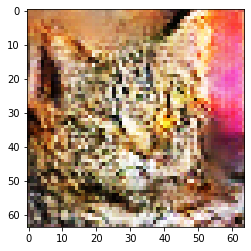

tf.Tensor([[0.6029923  0.08115372 0.31585398]], shape=(1, 3), dtype=float32)
Step: 9, Loss: 0.5058508515357971


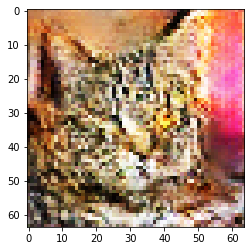

tf.Tensor([[0.52493125 0.00733667 0.46773213]], shape=(1, 3), dtype=float32)
Step: 10, Loss: 0.6444879770278931


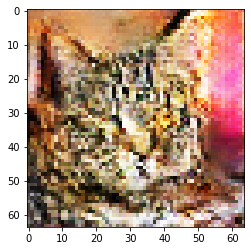

tf.Tensor([[7.1838170e-01 3.9324444e-04 2.8122500e-01]], shape=(1, 3), dtype=float32)
Step: 11, Loss: 0.33075422048568726


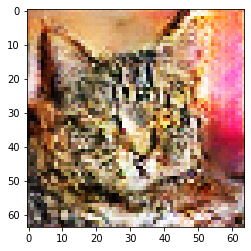

tf.Tensor([[0.88301015 0.00285474 0.11413508]], shape=(1, 3), dtype=float32)
Step: 12, Loss: 0.12441858649253845


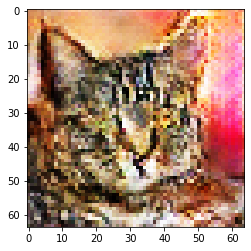

tf.Tensor([[9.924346e-01 2.720473e-04 7.293403e-03]], shape=(1, 3), dtype=float32)
Step: 13, Loss: 0.007594141643494368


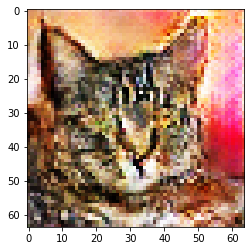

tf.Tensor([[0.7203578  0.04372148 0.23592073]], shape=(1, 3), dtype=float32)
Step: 14, Loss: 0.3280072808265686


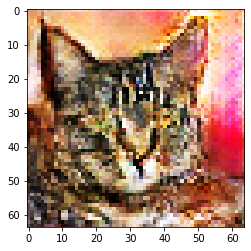

tf.Tensor([[9.9986196e-01 4.4184644e-06 1.3362186e-04]], shape=(1, 3), dtype=float32)
Step: 15, Loss: 0.00013805388880427927


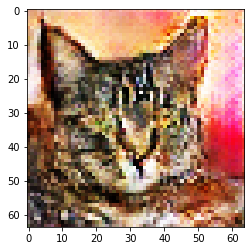

tf.Tensor([[0.7148762  0.11084178 0.1742821 ]], shape=(1, 3), dtype=float32)
Step: 16, Loss: 0.3356459438800812


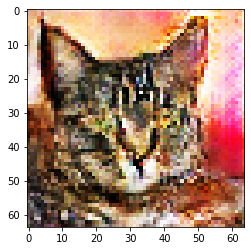

tf.Tensor([[0.26551735 0.04811078 0.68637186]], shape=(1, 3), dtype=float32)
Step: 17, Loss: 1.3260750770568848


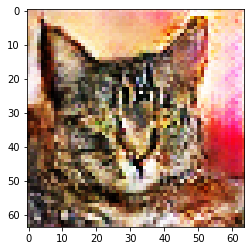

tf.Tensor([[9.9979419e-01 2.5906506e-06 2.0325663e-04]], shape=(1, 3), dtype=float32)
Step: 18, Loss: 0.00020583602599799633


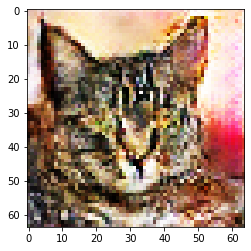

tf.Tensor([[9.9680662e-01 5.2653853e-04 2.6668538e-03]], shape=(1, 3), dtype=float32)
Step: 19, Loss: 0.003198488149791956


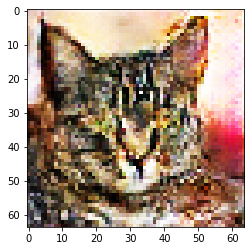

tf.Tensor(0.0031984881, shape=(), dtype=float32)


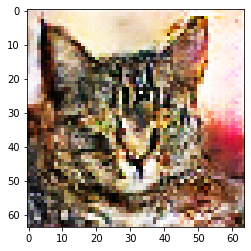

tf.Tensor([[9.9955946e-01 4.5439842e-06 4.3604345e-04]], shape=(1, 3), dtype=float32)
Step: 0, Loss: 0.0004406349908094853


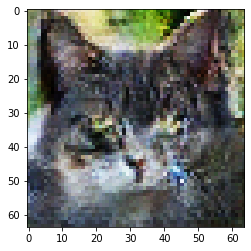

tf.Tensor([[0.88794845 0.0074957  0.10455582]], shape=(1, 3), dtype=float32)
Step: 1, Loss: 0.11884158849716187


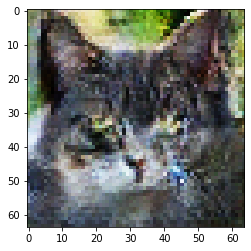

tf.Tensor([[0.8677551  0.04359609 0.08864886]], shape=(1, 3), dtype=float32)
Step: 2, Loss: 0.14184586703777313


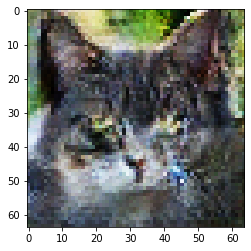

tf.Tensor([[9.9962223e-01 2.8099026e-05 3.4964053e-04]], shape=(1, 3), dtype=float32)
Step: 3, Loss: 0.0003777859965339303


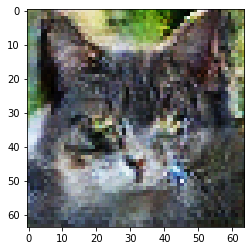

tf.Tensor([[0.8535834  0.02823389 0.11818267]], shape=(1, 3), dtype=float32)
Step: 4, Loss: 0.15831196308135986


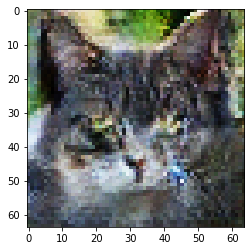

tf.Tensor([[0.7495474  0.00772917 0.24272338]], shape=(1, 3), dtype=float32)
Step: 5, Loss: 0.2882857024669647


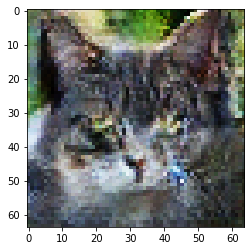

tf.Tensor([[0.89249617 0.00452514 0.10297872]], shape=(1, 3), dtype=float32)
Step: 6, Loss: 0.11373306065797806


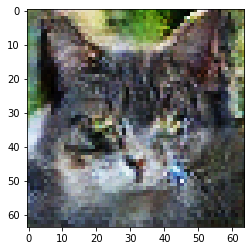

tf.Tensor([[9.9969566e-01 1.6708884e-05 2.8773045e-04]], shape=(1, 3), dtype=float32)
Step: 7, Loss: 0.0003045068879146129


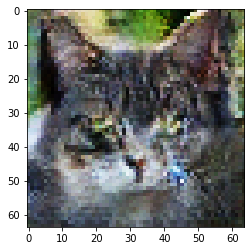

tf.Tensor([[0.97989297 0.00165506 0.0184519 ]], shape=(1, 3), dtype=float32)
Step: 8, Loss: 0.02031186781823635


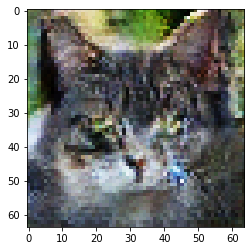

tf.Tensor([[9.9805778e-01 2.1924228e-05 1.9203064e-03]], shape=(1, 3), dtype=float32)
Step: 9, Loss: 0.0019441059557721019


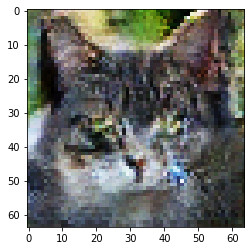

tf.Tensor([[9.9997056e-01 7.9756074e-07 2.8621260e-05]], shape=(1, 3), dtype=float32)
Step: 10, Loss: 2.938552097475622e-05


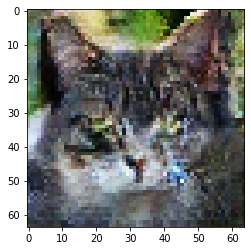

tf.Tensor([[0.95307827 0.00496199 0.04195977]], shape=(1, 3), dtype=float32)
Step: 11, Loss: 0.048058249056339264


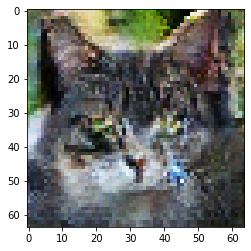

tf.Tensor([[0.96159    0.00491032 0.03349974]], shape=(1, 3), dtype=float32)
Step: 12, Loss: 0.03916724771261215


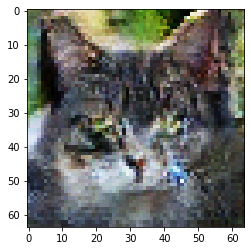

tf.Tensor([[0.87266594 0.00184491 0.12548913]], shape=(1, 3), dtype=float32)
Step: 13, Loss: 0.13620245456695557


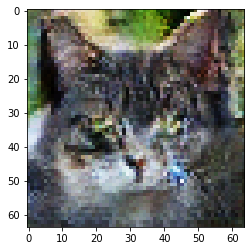

tf.Tensor([[0.95850176 0.00372999 0.03776822]], shape=(1, 3), dtype=float32)
Step: 14, Loss: 0.04238388314843178


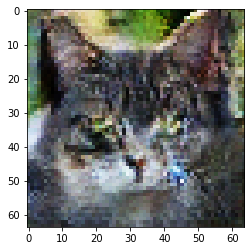

tf.Tensor([[0.8625958  0.02431446 0.11308974]], shape=(1, 3), dtype=float32)
Step: 15, Loss: 0.14780907332897186


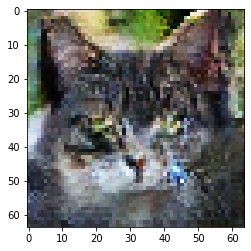

tf.Tensor([[0.7751321  0.10449918 0.12036867]], shape=(1, 3), dtype=float32)
Step: 16, Loss: 0.2547217011451721


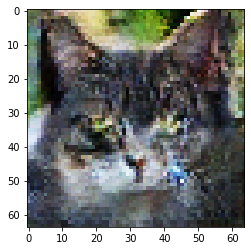

tf.Tensor([[0.9558327  0.0071037  0.03706348]], shape=(1, 3), dtype=float32)
Step: 17, Loss: 0.04517223685979843


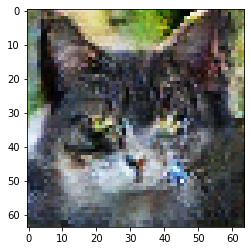

tf.Tensor([[9.9936169e-01 1.1347752e-04 5.2483490e-04]], shape=(1, 3), dtype=float32)
Step: 18, Loss: 0.0006385099259205163


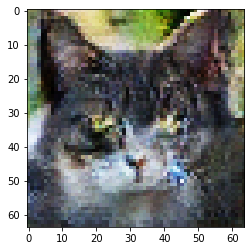

tf.Tensor([[0.9427538  0.03084583 0.02640041]], shape=(1, 3), dtype=float32)
Step: 19, Loss: 0.05895012244582176


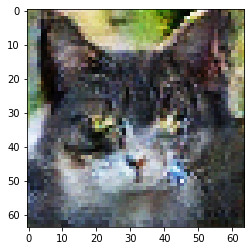

tf.Tensor(0.058950122, shape=(), dtype=float32)


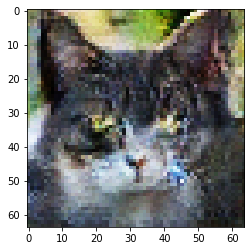

tf.Tensor([[0.03142701 0.00183669 0.9667363 ]], shape=(1, 3), dtype=float32)
Step: 0, Loss: 3.460087537765503


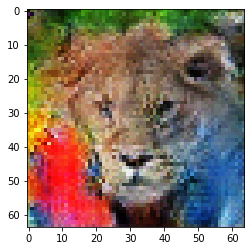

tf.Tensor([[0.53096646 0.02382156 0.44521198]], shape=(1, 3), dtype=float32)
Step: 1, Loss: 0.6330564022064209


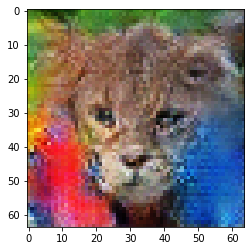

tf.Tensor([[0.23778501 0.09498253 0.66723245]], shape=(1, 3), dtype=float32)
Step: 2, Loss: 1.436388373374939


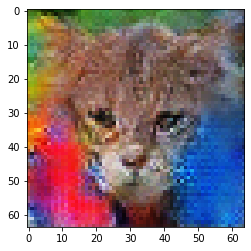

tf.Tensor([[0.88960457 0.00663789 0.10375749]], shape=(1, 3), dtype=float32)
Step: 3, Loss: 0.11697815358638763


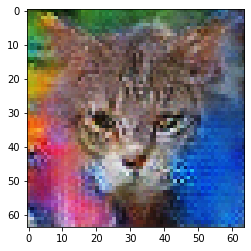

tf.Tensor([[9.9369299e-01 8.7606622e-04 5.4309494e-03]], shape=(1, 3), dtype=float32)
Step: 4, Loss: 0.006326979026198387


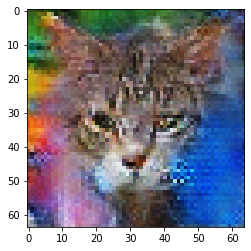

tf.Tensor([[0.9875195  0.00463215 0.00784841]], shape=(1, 3), dtype=float32)
Step: 5, Loss: 0.012559154070913792


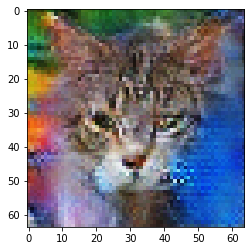

tf.Tensor([[0.58474535 0.22509177 0.19016285]], shape=(1, 3), dtype=float32)
Step: 6, Loss: 0.5365787148475647


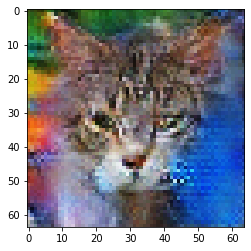

tf.Tensor([[0.99488306 0.00335346 0.00176345]], shape=(1, 3), dtype=float32)
Step: 7, Loss: 0.005130075849592686


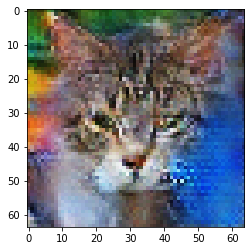

tf.Tensor([[9.9940729e-01 1.1778455e-04 4.7493912e-04]], shape=(1, 3), dtype=float32)
Step: 8, Loss: 0.0005928843165747821


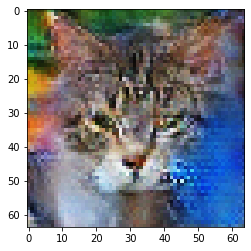

tf.Tensor([[9.9891269e-01 7.7719451e-05 1.0095685e-03]], shape=(1, 3), dtype=float32)
Step: 9, Loss: 0.0010878994362428784


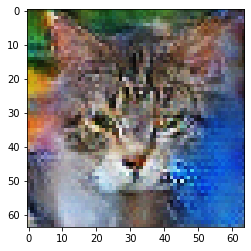

tf.Tensor([[9.9974269e-01 2.9924649e-05 2.2741746e-04]], shape=(1, 3), dtype=float32)
Step: 10, Loss: 0.0002573463716544211


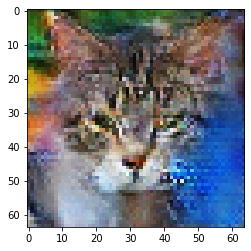

tf.Tensor([[0.99491584 0.00175795 0.00332628]], shape=(1, 3), dtype=float32)
Step: 11, Loss: 0.005097245331853628


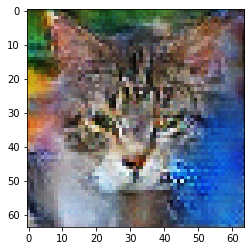

tf.Tensor([[0.8830173  0.04683552 0.07014718]], shape=(1, 3), dtype=float32)
Step: 12, Loss: 0.1244104877114296


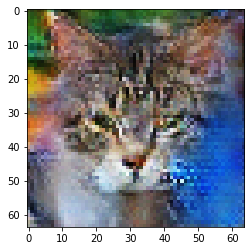

tf.Tensor([[0.6542173  0.20562884 0.14015388]], shape=(1, 3), dtype=float32)
Step: 13, Loss: 0.4243157207965851


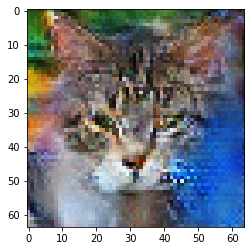

tf.Tensor([[9.9579805e-01 6.6118536e-04 3.5406721e-03]], shape=(1, 3), dtype=float32)
Step: 14, Loss: 0.004210741724818945


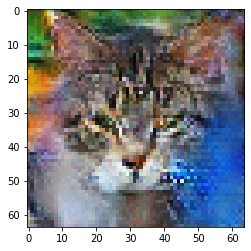

tf.Tensor([[0.762192   0.03152812 0.20627995]], shape=(1, 3), dtype=float32)
Step: 15, Loss: 0.27155694365501404


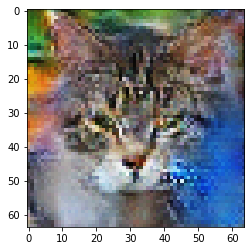

tf.Tensor([[9.9954826e-01 7.5484611e-05 3.7626945e-04]], shape=(1, 3), dtype=float32)
Step: 16, Loss: 0.0004518456698860973


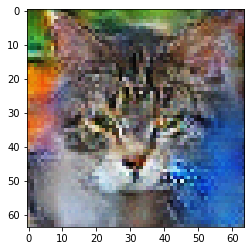

tf.Tensor([[9.9546635e-01 2.4128785e-04 4.2924201e-03]], shape=(1, 3), dtype=float32)
Step: 17, Loss: 0.004543956834822893


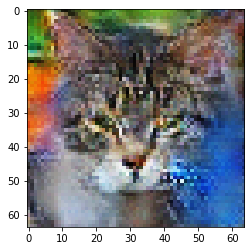

tf.Tensor([[0.7897333  0.18207745 0.0281892 ]], shape=(1, 3), dtype=float32)
Step: 18, Loss: 0.23605991899967194


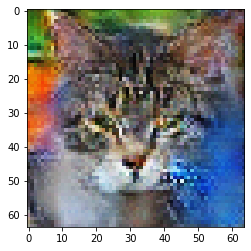

tf.Tensor([[0.99744475 0.00110119 0.00145414]], shape=(1, 3), dtype=float32)
Step: 19, Loss: 0.0025586409028619528


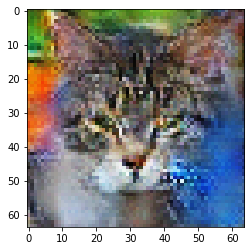

tf.Tensor(0.002558641, shape=(), dtype=float32)


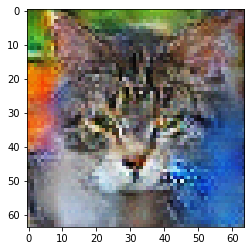

In [5]:
# TODO: a keresést egyszerre több elemre végezni, hogy ne egymás után kelljen

# cat = [1, 0, 0]
# dog = [0, 1, 0]
# wild = [0, 0, 1]

# Macska visszakeresése
goal_prediction = [1, 0, 0]

all_losses = []
for i in range(3):
    starting_noise = tf.random.uniform([1, latent_dim], minval=-2, maxval=2)
    
    gradient_momentum_noise, gdm_losses =\
        gradient_descent_momentum(goal_prediction, starting_noise, 0.1, 0.5, 20, verbose=True)
    
    all_losses.append(gdm_losses)
    print(gdm_losses[-1])
    generated_image = generator(gradient_momentum_noise, training=False)[0]
    plt.imshow((generated_image[0].numpy()*127.5+127.5).astype("uint8"), interpolation="none")
    plt.show()

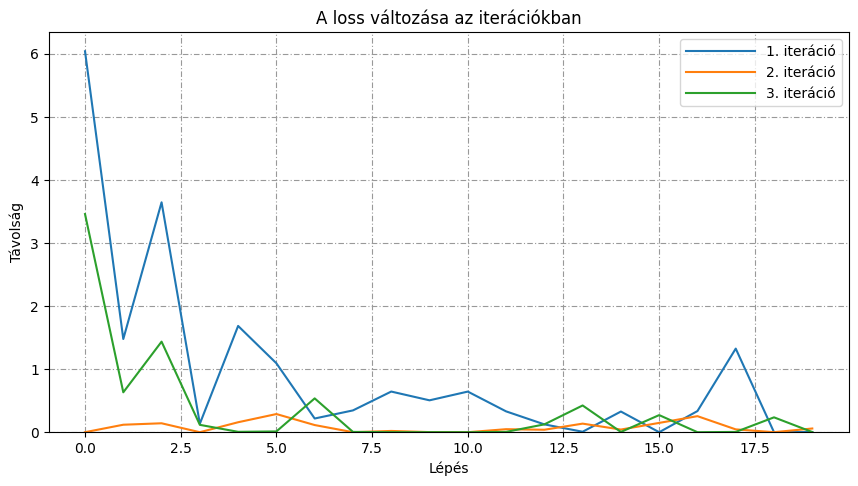

In [6]:
fig_1 = plt.figure(figsize=(8, 4), dpi=100)
ax = fig_1.add_axes([0, 0, 1, 1])
ax.set_xlabel('Lépés')
ax.set_ylabel('Távolság')
ax.set_title('A loss változása az iterációkban')

ax.grid(True, color='0.6', dashes=(5, 2, 1, 2))

for i in range(len(all_losses)):
    ax.plot(all_losses[i], label=str(i+1)+". iteráció")

ax.set_ylim(bottom=0)
ax.legend(loc=0, handlelength=5)

plt.show()

In [7]:
# Egy kutya és egy macska keresése, majd interpoláció a kettő között:

dog_label = [0, 1, 0]
cat_label = [1, 0, 0]

starting_noise = tf.random.uniform([1, latent_dim], minval=-2, maxval=2)
dog_noise, _ =\
        gradient_descent_momentum(dog_label, starting_noise, 0.1, 0.5, 20, verbose=False)

starting_noise = tf.random.uniform([1, latent_dim], minval=-2, maxval=2)
cat_noise, _ =\
        gradient_descent_momentum(cat_label, starting_noise, 0.1, 0.5, 20, verbose=False)

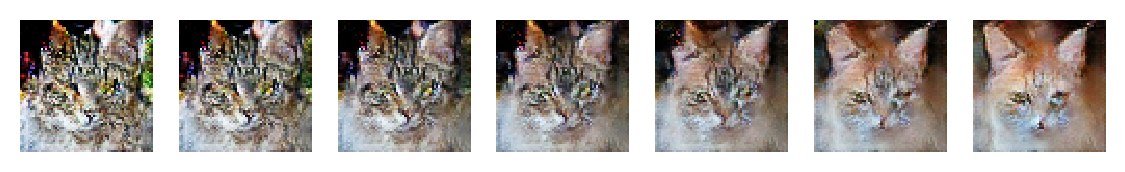

In [8]:
from scipy.interpolate import interp1d
import numpy as np

step_size = 8
linfit = interp1d([1, step_size], np.vstack([dog_noise, cat_noise]), axis=0)

res = []
for j in range(1,step_size):
    generated_image = generator(linfit(j).reshape(1, latent_dim), training=False)
    res.append(generated_image)
        
fig, axes = plt.subplots(figsize=(len(res), 1), nrows=1, ncols=len(res), dpi=200)
for i in range(len(res)):
    gen_1 = res[i][0][0].numpy()*127.5+127.5
    axes[i].axis('off')
    axes[i].imshow((gen_1).astype("uint8"), interpolation='none')
plt.show()

2022-04-19 19:32:42.511048: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


array([[9.6758658e-01, 4.6636732e-04, 3.1947043e-02]], dtype=float32)

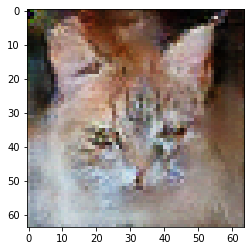

In [9]:
pointer = -2

plt.imshow((res[pointer][0][0].numpy()*127.5+127.5).astype("uint"))

inception_model.predict(res[pointer][0])

tf.Tensor([[0.37297815 0.11683349 0.51018846]], shape=(1, 3), dtype=float32)
Step: 0, Loss: 0.923583447933197


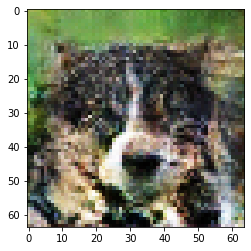

tf.Tensor([[0.17785081 0.6733432  0.14880602]], shape=(1, 3), dtype=float32)
Step: 1, Loss: 1.7624704837799072


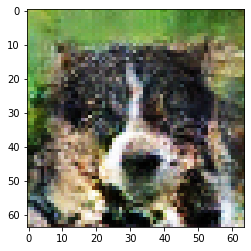

tf.Tensor([[0.4618044  0.0717162  0.46647936]], shape=(1, 3), dtype=float32)
Step: 2, Loss: 0.770599365234375


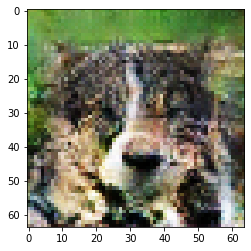

tf.Tensor([[0.00271872 0.00305916 0.9942221 ]], shape=(1, 3), dtype=float32)
Step: 3, Loss: 4.72723388671875


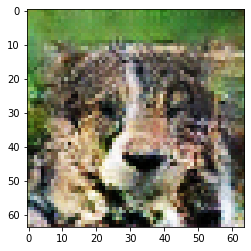

tf.Tensor([[0.69070685 0.04436113 0.264932  ]], shape=(1, 3), dtype=float32)
Step: 4, Loss: 0.5616883039474487


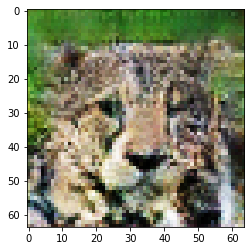

tf.Tensor([[0.10678283 0.07064241 0.82257473]], shape=(1, 3), dtype=float32)
Step: 5, Loss: 1.8286296129226685


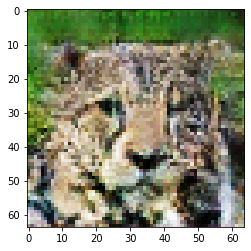

tf.Tensor([[0.4337462  0.05440962 0.5118442 ]], shape=(1, 3), dtype=float32)
Step: 6, Loss: 0.8021836280822754


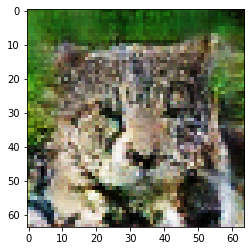

tf.Tensor([[0.8258315  0.05252385 0.12164466]], shape=(1, 3), dtype=float32)
Step: 7, Loss: 0.5744218826293945


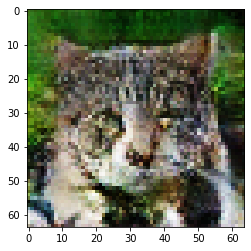

tf.Tensor([[0.86506784 0.01245848 0.12247358]], shape=(1, 3), dtype=float32)
Step: 8, Loss: 0.535929799079895


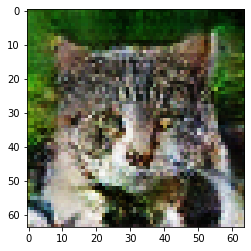

tf.Tensor([[9.9482048e-01 1.7513706e-04 5.0042942e-03]], shape=(1, 3), dtype=float32)
Step: 9, Loss: 1.0636460781097412


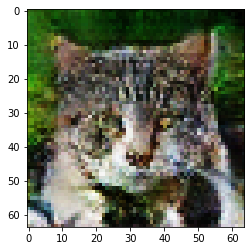

tf.Tensor([[0.49803722 0.21156432 0.29039845]], shape=(1, 3), dtype=float32)
Step: 10, Loss: 0.8049646615982056


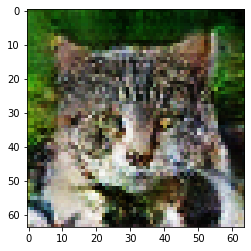

tf.Tensor([[0.7284597  0.13180363 0.13973661]], shape=(1, 3), dtype=float32)
Step: 11, Loss: 0.6470574736595154


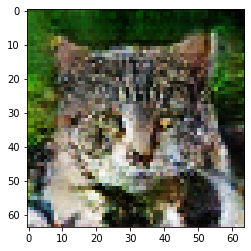

tf.Tensor([[0.8779478  0.06806741 0.0539848 ]], shape=(1, 3), dtype=float32)
Step: 12, Loss: 0.6879450678825378


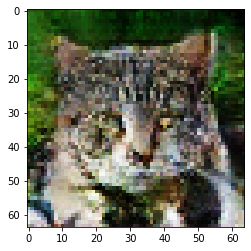

tf.Tensor([[9.9780375e-01 8.5250191e-05 2.1109225e-03]], shape=(1, 3), dtype=float32)
Step: 13, Loss: 1.2338849306106567


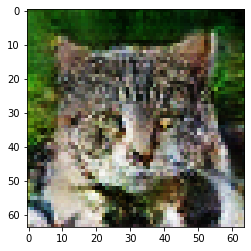

tf.Tensor([[0.60646975 0.09963553 0.2938947 ]], shape=(1, 3), dtype=float32)
Step: 14, Loss: 0.6449871063232422


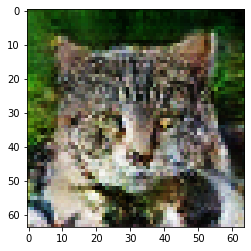

tf.Tensor([[0.7585464  0.03656974 0.20488386]], shape=(1, 3), dtype=float32)
Step: 15, Loss: 0.5381434559822083


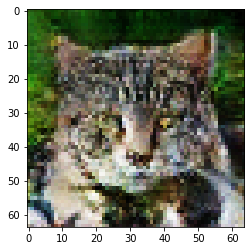

tf.Tensor([[0.7146473  0.00100465 0.284348  ]], shape=(1, 3), dtype=float32)
Step: 16, Loss: 0.5202841758728027


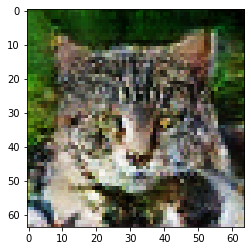

tf.Tensor([[0.95255125 0.00108291 0.04636582]], shape=(1, 3), dtype=float32)
Step: 17, Loss: 0.6531276106834412


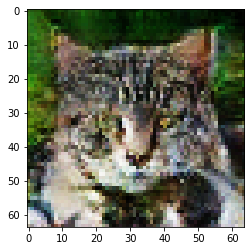

tf.Tensor([[0.9500116  0.00156034 0.048428  ]], shape=(1, 3), dtype=float32)
Step: 18, Loss: 0.6465602517127991


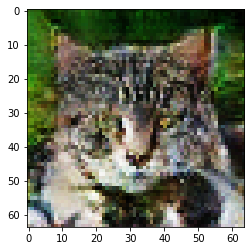

tf.Tensor([[0.9609992  0.00317782 0.03582309]], shape=(1, 3), dtype=float32)
Step: 19, Loss: 0.6976580619812012


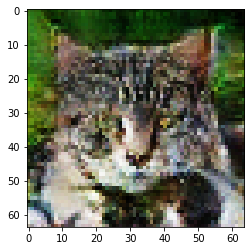

In [10]:
# Mixelt label-ök súly szerint

mixed_label = [0.8, 0.0, 0.2]

starting_noise = tf.random.uniform([1, latent_dim], minval=-2, maxval=2)
mixed_noise, _ =\
        gradient_descent_momentum(mixed_label, starting_noise, 0.1, 0.5, 20, verbose=True)